<br/>
<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color:rgb(52, 152, 219); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">Préparation des données</h1>
<br/>
<br/>
  

In [20]:
!pip install missingno

In [42]:
#importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import numpy as np
import fonctions_utilisees as f

In [3]:
url="https://raw.githubusercontent.com/JosueAfouda/Marketing-Pandas/master/marketing.csv"
marketing_df= pd.read_csv(url)

In [7]:
print(marketing_df.info())
marketing_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [6]:
marketing_df.describe().T

,count,unique,top,freq
user_id,10037,7309,a100000882,12
date_served,10021,31,1/15/18,789
marketing_channel,10022,5,House Ads,4733
variant,10037,2,control,5091
converted,10022,2,False,8946
language_displayed,10037,4,English,9793
language_preferred,10037,4,English,9275
age_group,10037,7,19-24 years,1682
date_subscribed,1856,31,1/16/18,163
date_canceled,577,115,4/2/18,15


<p style="font-family: 'Georgia', serif; font-size: 20px;">
il ya en tout 7309 client(user), 5 canaux marketing(Marketin_channel), 4 langues utilisées pour le marketing(language_displayed	), et 7 groupes d'age 
</p>
<br/>
<br/>

<p style="font-family: 'Georgia', serif; text-align: center; font-size: 20px;">
visualisation des valeurs manquantes dans la BD 
</p>

<Axes: >

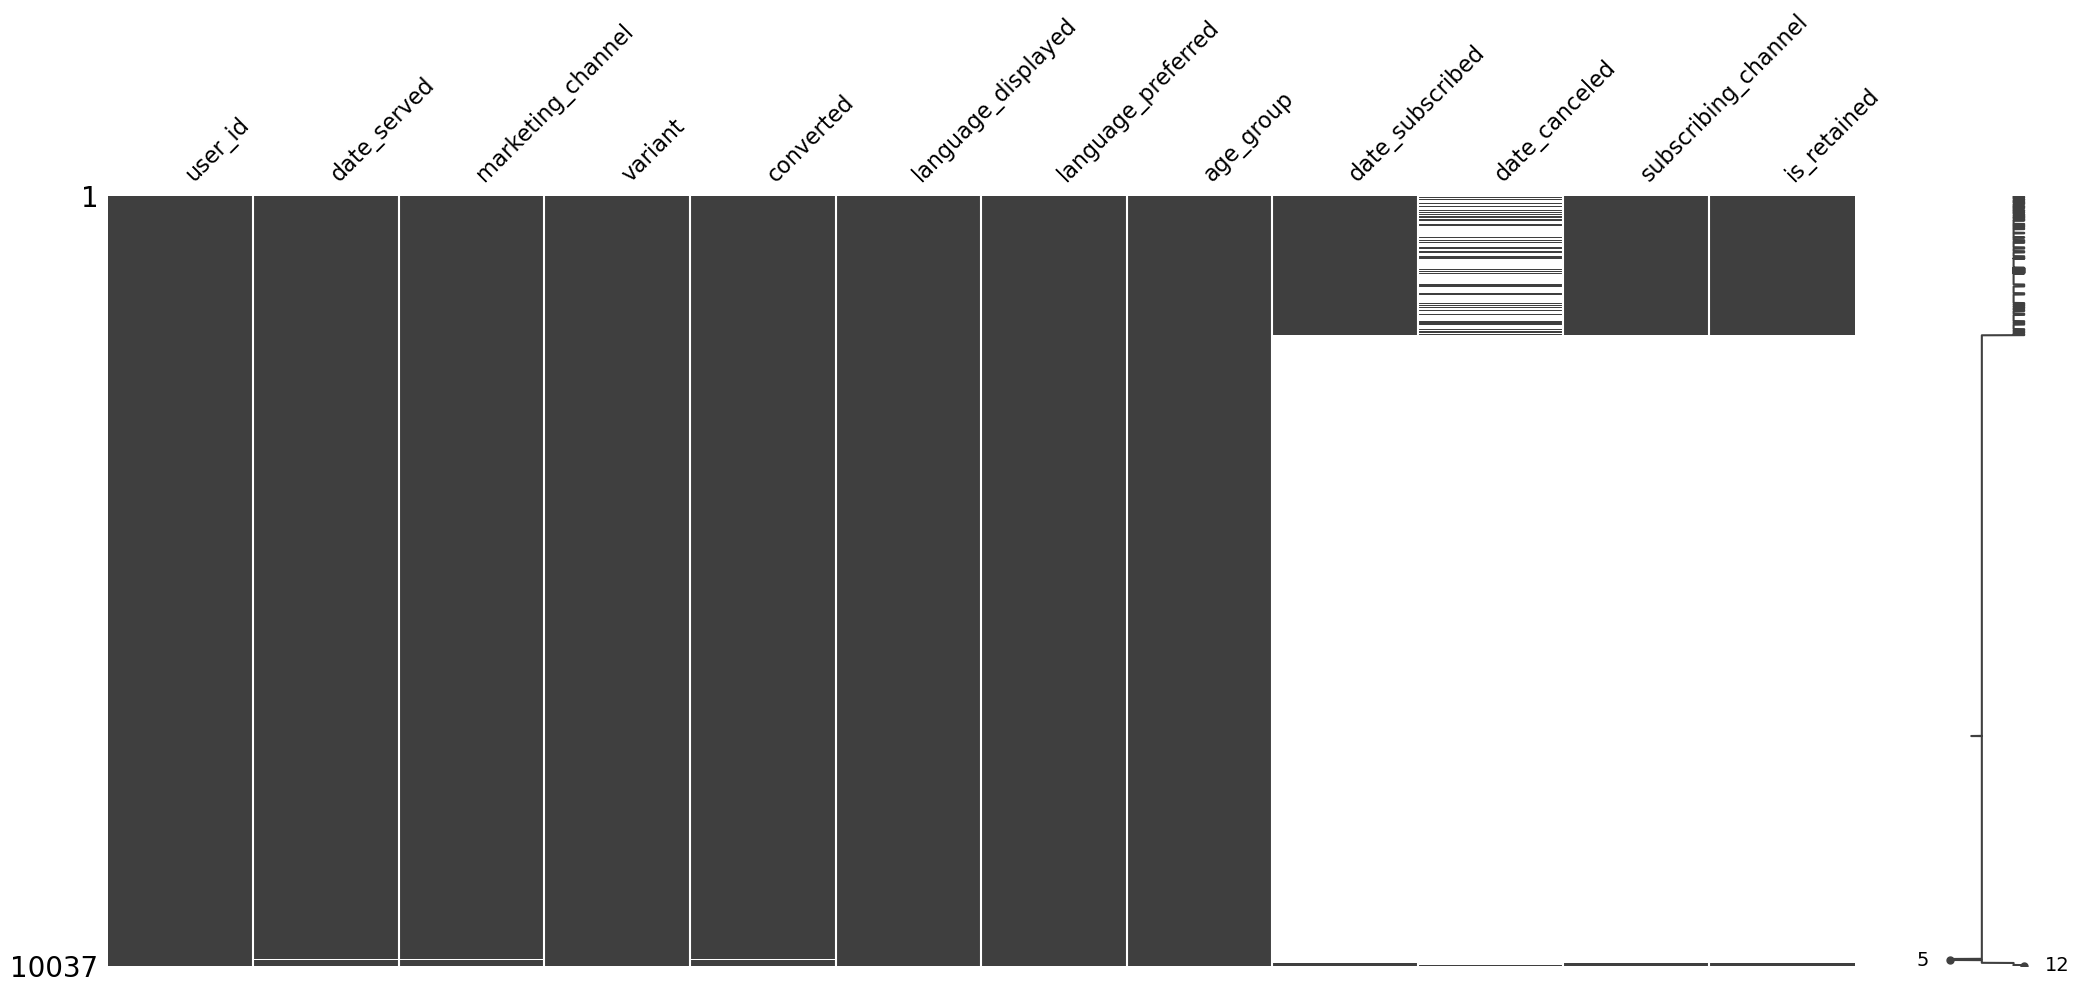

In [24]:
ms.matrix(marketing_df)

<p style="font-family: 'Georgia', serif;  font-size: 20px;">
les variables manquantes sont des date de souscription, annulation ce qui est logique vue qu'on n'annule, ne souscris...  pas toujours 
</p>

<p style="font-family: 'Georgia', serif; text-align: center; font-size: 20px;">
ci dessous les canaux marketing utilisés par l'entreprise
</p>

In [9]:
marketing_df["marketing_channel"].value_counts(normalize = True)
#normaliser pour pouvoir mieux apprécier les parts de chaque canal

marketing_channel
House Ads    0.472261
Instagram    0.186689
Facebook     0.185592
Push         0.099082
Email        0.056376
Name: proportion, dtype: float64

<p style="font-family: 'Georgia', serif; text-align: center; font-size: 20px;">
l'entreprise utilise majoritairement ses propres canaux(house Ads 47%) instagram(18,6%) et facebook(18,5%) 
</p>

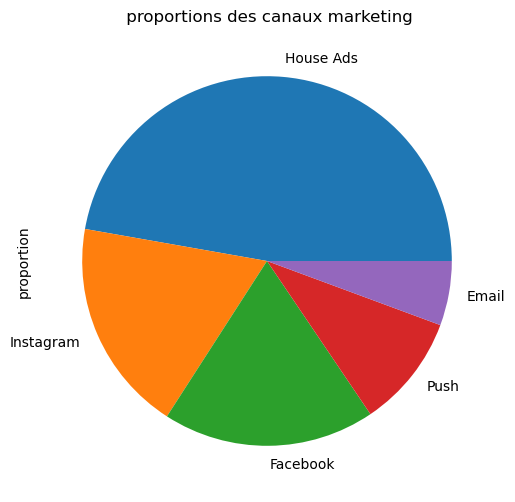

In [22]:
#visualisation graphique
plt.figure(figsize=(6,6))
marketing_df["marketing_channel"].value_counts(normalize = True).plot(kind='pie')
plt.title(" proportions des canaux marketing")
plt.show()

<br/>

<p style="font-family: 'Georgia', serif; text-align: center; font-size: 20px;">
les variables date_served, date_subscribed et date_canceled n'etant pas au bon format nous les mettrons au format DATETIME
</p>

In [ ]:
for col in ['date_served', 'date_subscribed', 'date_canceled']:
    marketing_df[col]= pd.to_datetime(marketing_df[col])

<p style="font-family: 'Georgia', serif;  font-size: 20px;">
Verification de la convertion 
</p>

In [27]:
marketing_df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

 <br/>
<p style="font-family: 'Georgia', serif;  font-size: 20px;">
les variables date sont maintenant dans un bon format
</p>


<br/>
<p style="font-family: 'Georgia', serif;  font-size: 20px;">
Quel est le nombre d'utilisateur retenus par la campagne?
</p>

In [66]:
#on compte parmi les id unique pour eviter de compter ceux qui ont été retenu plusieurs fois
unique_users= marketing_df.drop_duplicates(subset='user_id' , keep='first' )


print(unique_users.is_retained.sum()," ont été retenus par la campagne")
unique_users["is_retained"].value_counts(normalize=True)


670  ont été retenus par la campagne


is_retained
True     0.656863
False    0.343137
Name: proportion, dtype: float64

 <br/>
<p style="font-family: 'Georgia', serif;  font-size: 20px;">
670 utilisateurs ont été retenus par la campagne soit pres de 65,6% des utilisateurs unique
</p>


In [62]:
marketing_df['unique_users']=unique_users['user_id']
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  channel_code         1856 non-null   float64       
 13  is_correct_lang      10037 non-

 <br/>
 <br/>
<p style="font-family: 'Georgia', serif;  font-size: 20px;">
nous allons a présent encoder par ordre decroissant les modalités de la variable subscribing_channel afin de faciliter leur manipulation 
</p>


In [33]:
marketing_df['subscribing_channel'].value_counts(normalize=True)

subscribing_channel
Instagram    0.323276
Facebook     0.239763
House Ads    0.190733
Email        0.156250
Push         0.089978
Name: proportion, dtype: float64

In [34]:
dict_channels ={'House Ads':1, 'Instagram':2,'Facebook':3,'Email':4,'Push':5}

In [35]:
#creation de la colonne 'channel_code'
marketing_df['channel_code']= marketing_df['subscribing_channel'].map(dict_channels)

In [40]:
marketing_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0


 <br/>
 <br/>
<p style="font-family: 'Georgia', serif;  font-size: 20px;">
creation d'une colonne is_correct_lang qui vaut True si l'utilisateur a vu les annonces dans sa langue preférée et False sinon!
</p>


In [46]:
#il s'agit ici  de comparer language_displayed à language_preferred
marketing_df['is_correct_lang']= np.where(marketing_df['language_displayed']==marketing_df['language_preferred'], True,False)

In [47]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  channel_code         1856 non-null   float64       
 13  is_correct_lang      10037 non-

 <br/>
 <br/>
<p style="font-family: 'Georgia', serif;  font-size: 20px;">
creation d'une colonne DoW qui represente le jour de la semaine (jour de souscription)
</p>


In [50]:
marketing_df['Dow']= marketing_df['date_subscribed'].dt.day_of_week
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  channel_code         1856 non-null   float64       
 13  is_correct_lang      10037 non-

 <br/>
 <br/>
<p style="font-family: 'Georgia', serif; text-align:'center' ; font-size: 24px;">
<u><b>
Nombre d'utilisateurs unique qui voient les annonces Marketing chaque jour
</b></u>
</p>


 <br/>
 <br/>
<p style="font-family: 'Georgia', serif;  font-size: 20px;">
Ceci nous permettra de comprendre l'efficacité des efforts marketing au cours du dernier mois 
<br/>
pour cela, on regroupe les observations par la variable date_served et compter le nombre d'utilisateurs
</p>


In [68]:
daily_users= marketing_df.groupby('date_served')['user_id'].nunique()
print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


In [ ]:
#visualisation des resultats 

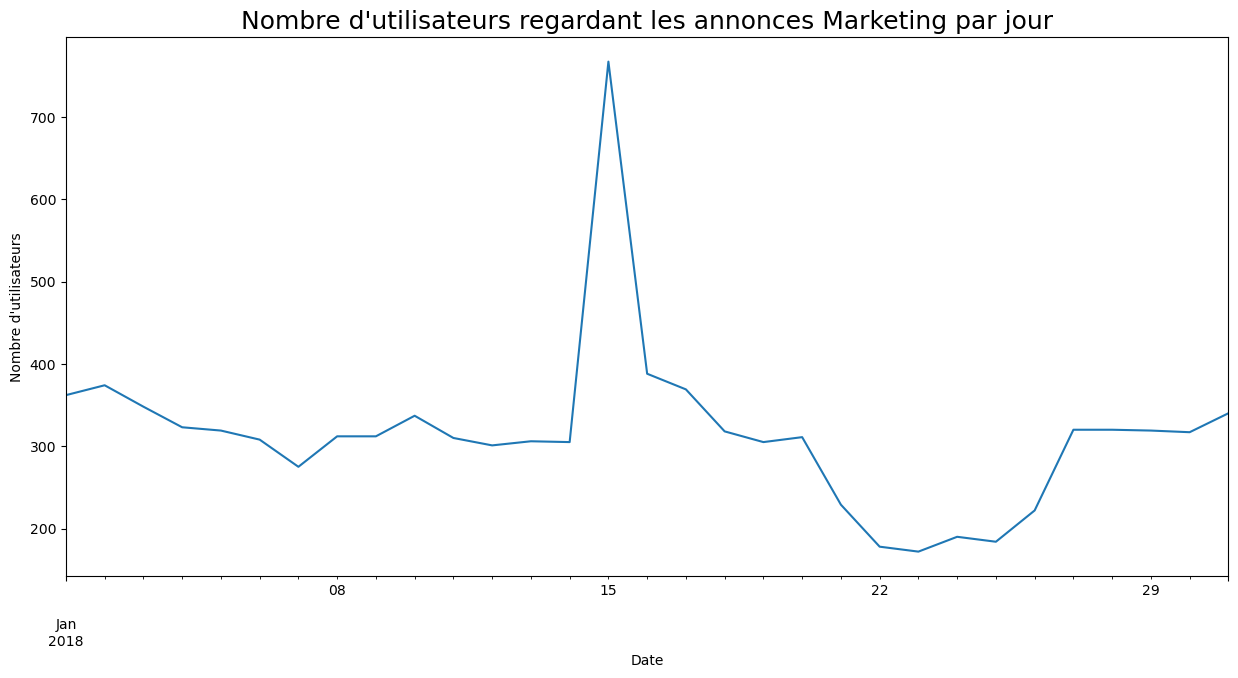

In [71]:
plt.figure(figsize=(15,7))
daily_users.plot.line()
plt.xlabel('Date')
plt.ylabel("Nombre d'utilisateurs")
plt.title("Nombre d'utilisateurs regardant les annonces Marketing par jour",fontsize=18)
plt.show()

 <br/>
<p style="font-family: 'Georgia', serif;  font-size: 20px;">
nous constatons que  entre les 15 premiers  jours du mois le nombre d'utilisateurs varie entre 400 et 300 puis le 15e jour atteint un pic avant de rechuter progressivement jusqu'au 25 du mois ou il ya environ 200 utilisateurs , puis de remonter a plus de 300  à la fin du mois.
</p>
<br/>